In [1]:
import pytesseract
from PIL import Image
import os

In [ ]:
# pip install pytesseract Pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
os.getcwd()

'd:\\TutorEngine\\experiment_lab'

In [3]:
image_path = os.path.join(os.getcwd(), 'integration.png')

In [4]:
image_path

'd:\\TutorEngine\\experiment_lab\\integration.png'

In [5]:
image = Image.open(image_path)

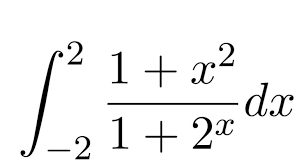

In [6]:
image

In [ ]:
C:\Program Files\Tesseract-OCR

In [8]:
pytesseract.pytesseract.tesseract_cmd = r'C://Program Files/Tesseract-OCR/tesseract.exe'

In [9]:
# OCR: Extract text from the image
extracted_text = pytesseract.image_to_string(image)

In [10]:
print("Extracted Text:", extracted_text)

Extracted Text: [ 14+ x2
x
5 142%



In [ ]:
from flask import Flask, request, jsonify
import pytesseract  # For Tesseract OCR
from PIL import Image  # For image processing
import io
import sympy #for math solving

app = Flask(__name__)

# Configure Tesseract (adjust path if needed)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract' #example path, check your tesseract installation path

@app.route('/process_image', methods=['POST'])
def process_image():
    if 'image' not in request.files:
        return jsonify({'error': 'No image provided'}), 400

    image_file = request.files['image']
    try:
        image = Image.open(io.BytesIO(image_file.read()))
        extracted_text = pytesseract.image_to_string(image)

        # Example: Basic text return (you'll add math logic here)
        result = {"extracted_text": extracted_text}

        #Example Math Solving Section.
        try:
            equation = sympy.sympify(extracted_text)
            x = sympy.symbols('x')
            solution = sympy.solve(equation, x)
            result["solution"] = str(solution)

        except:
            print("Math solving error")

        return jsonify(result), 200

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
import google.generativeai as genai
import PIL.Image as Image
import io
import requests

# Configure your API key
genai.configure(api_key="YOUR_API_KEY")

def generate_response_with_image(image_data, prompt_text):
    """Generates a response from Gemini with an image and text prompt."""

    model = genai.GenerativeModel('gemini-pro-vision')

    try:
        response = model.generate_content([prompt_text, image_data])
        return response.text
    except Exception as e:
        return f"An error occurred: {e}"

def image_from_url(url):
    """Fetches an image from a URL and returns it as a PIL Image."""
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
        image = Image.open(io.BytesIO(response.content))
        return image

    except requests.exceptions.RequestException as e:
        print(f"Error fetching image from URL: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occured: {e}")
        return None

def image_from_file(file_path):
    """Opens an image from a local file path and returns it as a PIL Image."""
    try:
        image = Image.open(file_path)
        return image
    except Exception as e:
        print(f"Error opening image: {e}")
        return None

# Example usage (from URL)
image_url = "YOUR_IMAGE_URL" #replace with your image url
image_data = image_from_url(image_url)

if image_data:
    prompt = "Describe the image." #your prompt
    response_text = generate_response_with_image(image_data, prompt)
    print(response_text)

# Example Usage (from local file)
local_image_path = "local_image.jpg" #replace with your local image file path
local_image = image_from_file(local_image_path)

if local_image:
    prompt = "What objects are present in this image?"
    local_response = generate_response_with_image(local_image, prompt)
    print(local_response)

In [ ]:
from groq import Groq
import base64

client = Groq(api_key="your_api_key")
with open("image.jpg", "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode("utf-8")

response = client.chat.completions.create(
    model="llama-3.2-11b-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "Describe this image"},
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encoded_image}"}}
            ]
        }
    ]
)
print(response.choices[0].message.content)